<a href="https://colab.research.google.com/github/HongKing896/23-1IAP/blob/DooHk/%EB%BF%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import re
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from datetime import datetime, timedelta

def get_file(path):
  list = []
  for currentdir, dirs, files in os.walk(path):
    for f in files:
      list.append(os.path.join(currentdir,f))
  return list

def get_filename(path):
  list = []
  list = os.listdir(path)
  return list

def get_image(file):
  img = Image.open(file)
  img = np.array(img)
  
  return img

def time_to_label(my_list):
    first_time = datetime.strptime(my_list[0], '%m%d%H%M%S')

    assigned_values = []
    for item in my_list:
        current_time = datetime.strptime(item[:10], '%m%d%H%M%S')
        time_difference = current_time - first_time
        hours_difference = time_difference.total_seconds() // 3600

        if hours_difference < 12:
            assigned_values.append(0)
        elif hours_difference < 24:
            assigned_values.append(1)
        elif hours_difference < 36:
            assigned_values.append(2)
        elif hours_difference < 48:
            assigned_values.append(3)
        elif hours_difference < 60:
            assigned_values.append(4)
        elif hours_difference < 72:
            assigned_values.append(5)
        else:
            assigned_values.append(6)

    return assigned_values

파일 불러오기

In [2]:
path = '/content/drive/MyDrive/뿌리 데이터(크기변환)/test'
os.chdir(path)
files = os.listdir(path)
i=0
files.sort(key=lambda x: (int(re.search(r'\d+', x).group()), x))
print(files)
list = []
filename = []
imglist = []
for dir in files:
  dirpath = os.path.join(path,dir)
  list.append(get_file(dirpath))
  filename.append(get_filename(dirpath))

print(len(list)) 
print(len(list[0]))

print(list[0][0])
print("filename len : ", len(filename))
print("filename[0] len : ", len(filename[0]))
print("filename[0] type : ",type(filename[0]))

#각 식물마다 사진찍힌 시간을 가지고 있는 리스트 39개 
extracted_numbers = []
read_me=[]
for i in range(4):
  extracted_numbers.append([])
  read_me.append([])
  filename[i].sort(key=lambda x: (int(re.search(r'root(\d+)_', x).group(1)) if re.search(r'root(\d+)_', x) else 0, int(re.search(r'_(\d+)', x).group(1)) if re.search(r'_(\d+)', x) else 0))
  for x in filename[i]:
    if(x == 'readme.txt'):
      read_me[i].append(1)
    elif(x[-8:-4]==' (1)'):
      extracted_numbers[i].append(x[-18:-8])
    elif(x[-7:-4] == '(1)'):
      extracted_numbers[i].append(x[-17:-7])
    else:
      extracted_numbers[i].append(x[-14:-4])
print(filename[0])
print(filename[1])
print(len(extracted_numbers))



#extracted_numbers를 이용해서 y_train 만들기
label = []
for i in range(4):
  label.append([])
  label[i] = time_to_label(extracted_numbers[i])
  #현재 오류 내용


print(len(label[0]))

['root1_220923', 'root2_220823', 'root3_220914', 'root3_221101']
4
501
/content/drive/MyDrive/뿌리 데이터(크기변환)/test/root1_220923/root1_220923114836.jpg
filename len :  4
filename[0] len :  501
filename[0] type :  <class 'list'>
['root1_220923114836.jpg', 'root1_220923121203.jpg', 'root1_220923123203.jpg', 'root1_220923125203.jpg', 'root1_220923131203.jpg', 'root1_220923133203.jpg', 'root1_220923135203.jpg', 'root1_220923141203.jpg', 'root1_220923143203.jpg', 'root1_220923145203.jpg', 'root1_220923151203.jpg', 'root1_220923153203.jpg', 'root1_220923155203.jpg', 'root1_220923161203.jpg', 'root1_220923162038.jpg', 'root1_220923162747.jpg', 'root1_220923165120.jpg', 'root1_220923171115.jpg', 'root1_220923173115.jpg', 'root1_220923175115.jpg', 'root1_220923181115.jpg', 'root1_220923183115.jpg', 'root1_220923185115.jpg', 'root1_220923191120.jpg', 'root1_220923193120.jpg', 'root1_220923195115.jpg', 'root1_220923201115.jpg', 'root1_220923203120.jpg', 'root1_220923205115.jpg', 'root1_220

파일 이름을 

In [96]:
#식물 별 y_train = label
#len(label) = 39



print(list[0])
print(path)
print(filename[0])
print(files)
x_train_path = []
dir = []
for i in files:
  dir.append(os.path.join(path,i))

  

for j in range(39):
  x_train_path.append([])
  for k in filename[j]:
    if(k != 'readme.txt'):
      x_train_path[j].append(os.path.join(dir[j],k))



x_train = []

x_train = [[] for _ in range(39)]

# i = 0
for j in range(len(x_train_path[0])):
    x_train[0].append(get_image(x_train_path[0][j]))

# i = 1
for j in range(len(x_train_path[1])):
    x_train[1].append(get_image(x_train_path[1][j]))

# i = 2
for j in range(len(x_train_path[2])):
    x_train[2].append(get_image(x_train_path[2][j]))

# i = 3
for j in range(len(x_train_path[3])):
    x_train[3].append(get_image(x_train_path[3][j]))

# i = 4
for j in range(len(x_train_path[4])):
    x_train[4].append(get_image(x_train_path[4][j]))

# i = 5
for j in range(len(x_train_path[5])):
    x_train[5].append(get_image(x_train_path[5][j]))

# i = 6
for j in range(len(x_train_path[6])):
    x_train[6].append(get_image(x_train_path[6][j]))

# i = 7
for j in range(len(x_train_path[7])):
    x_train[7].append(get_image(x_train_path[7][j]))

# i = 8
for j in range(len(x_train_path[8])):
    x_train[8].append(get_image(x_train_path[8][j]))

# i = 9
for j in range(len(x_train_path[9])):
    x_train[9].append(get_image(x_train_path[9][j]))

# i = 10
for j in range(len(x_train_path[10])):
    x_train[10].append(get_image(x_train_path[10][j]))

# i = 11
for j in range(len(x_train_path[11])):
    x_train[11].append(get_image(x_train_path[11][j]))

# i = 12
for j in range(len(x_train_path[12])):
    x_train[12].append(get_image(x_train_path[12][j]))

# i = 13
for j in range(len(x_train_path[13])):
    x_train[13].append(get_image(x_train_path[13][j]))

# i = 14
for j in range(len(x_train_path[14])):
    x_train[14].append(get_image(x_train_path[14][j]))

# i = 15
for j in range(len(x_train_path[15])):
    x_train[15].append(get_image(x_train_path[15][j]))

# i = 16
for j in range(len(x_train_path[16])):
    x_train[16].append(get_image(x_train_path[16][j]))

# i = 17
for j in range(len(x_train_path[17])):
    x_train[17].append(get_image(x_train_path[17][j]))

# i = 18
for j in range(len(x_train_path[18])):
    x_train[18].append(get_image(x_train_path[18][j]))

# i = 19
for j in range(len(x_train_path[19])):
    x_train[19].append(get_image(x_train_path[19][j]))

# i = 20
for j in range(len(x_train_path[20])):
    x_train[20].append(get_image(x_train_path[20][j]))

# i = 21
for j in range(len(x_train_path[21])):
    x_train[21].append(get_image(x_train_path[21][j]))

# i = 22
for j in range(len(x_train_path[22])):
    x_train[22].append(get_image(x_train_path[22][j]))

# i = 23
for j in range(len(x_train_path[23])):
    x_train[23].append(get_image(x_train_path[23][j]))

# i = 24
for j in range(len(x_train_path[24])):
    x_train[24].append(get_image(x_train_path[24][j]))

# i = 25
for j in range(len(x_train_path[25])):
    x_train[25].append(get_image(x_train_path[25][j]))

# i = 26
for j in range(len(x_train_path[26])):
    x_train[26].append(get_image(x_train_path[26][j]))

# i = 27
for j in range(len(x_train_path[27])):
    x_train[27].append(get_image(x_train_path[27][j]))

# i = 28
for j in range(len(x_train_path[28])):
    x_train[28].append(get_image(x_train_path[28][j]))

# i = 29
for j in range(len(x_train_path[29])):
    x_train[29].append(get_image(x_train_path[29][j]))

# i = 30
for j in range(len(x_train_path[30])):
    x_train[30].append(get_image(x_train_path[30][j]))

# i = 31
for j in range(len(x_train_path[31])):
    x_train[31].append(get_image(x_train_path[31][j]))

# i = 32
for j in range(len(x_train_path[32])):
    x_train[32].append(get_image(x_train_path[32][j]))

# i = 33
for j in range(len(x_train_path[33])):
    x_train[33].append(get_image(x_train_path[33][j]))

# i = 34
for j in range(len(x_train_path[34])):
    x_train[34].append(get_image(x_train_path[34][j]))

# i = 35
for j in range(len(x_train_path[35])):
    x_train[35].append(get_image(x_train_path[35][j]))

# i = 36
for j in range(len(x_train_path[36])):
    x_train[36].append(get_image(x_train_path[36][j]))

# i = 37
for j in range(len(x_train_path[37])):
    x_train[37].append(get_image(x_train_path[37][j]))

# i = 38
for j in range(len(x_train_path[38])):
    x_train[38].append(get_image(x_train_path[38][j]))




['/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220821200902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220818224902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220819190902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220819150902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220822182902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220819214902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220822034902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220820004902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220822134902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220823104902.jpg', '/content/drive/MyDrive/뿌리 데이터(크기변환)/train/root1_220818/root1_220822

In [3]:
x_train = np.load('/content/drive/MyDrive/x_train.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy',allow_pickle=True)

print(len(x_train))
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 174,320,1)
print(len(y_train))

17095
(17095, 174, 320)
39


In [4]:
import keras

y_train = np.concatenate(y_train)
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_shape = (174,320,1)

In [5]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print(x_train.shape)

(13676, 174, 320, 1)


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [7]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 174, 320, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 87, 160, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 160, 64)       8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 80, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 43, 80, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 220160)           

In [9]:

batch_size = 128
epochs = 9
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, 
validation_data=(x_test, y_test))

Epoch 1/9
107/107 [==============================] - 48s 336ms/step - loss: 1.0937 - accuracy: 0.5983 - val_loss: 0.6752 - val_accuracy: 0.7426
Epoch 2/9
107/107 [==============================] - 33s 312ms/step - loss: 0.5641 - accuracy: 0.7831 - val_loss: 0.3921 - val_accuracy: 0.8561
Epoch 3/9
107/107 [==============================] - 34s 319ms/step - loss: 0.3744 - accuracy: 0.8560 - val_loss: 0.3022 - val_accuracy: 0.8918
Epoch 4/9
107/107 [==============================] - 34s 319ms/step - loss: 0.2910 - accuracy: 0.8865 - val_loss: 0.2407 - val_accuracy: 0.9257
Epoch 5/9
107/107 [==============================] - 34s 319ms/step - loss: 0.2333 - accuracy: 0.9151 - val_loss: 0.2076 - val_accuracy: 0.9231
Epoch 6/9
107/107 [==============================] - 34s 319ms/step - loss: 0.2012 - accuracy: 0.9256 - val_loss: 0.1898 - val_accuracy: 0.9357
Epoch 7/9
107/107 [==============================] - 34s 321ms/step - loss: 0.1786 - accuracy: 0.9347 - val_loss: 0.1837 - val_accuracy:

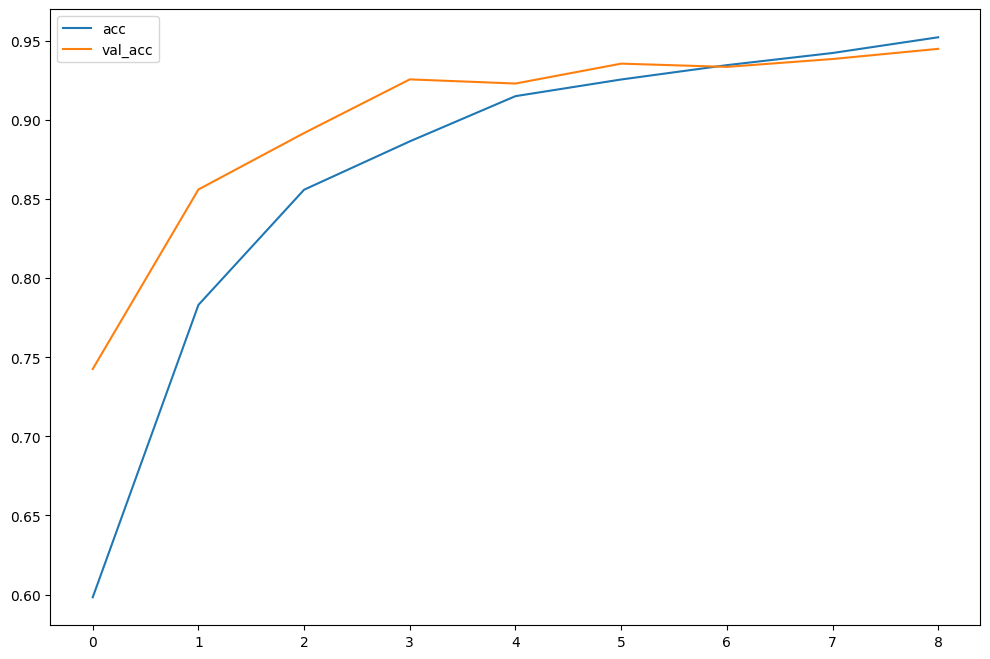

In [11]:
plt.figure(figsize=(12,8))
#plt.plot(hist.history['loss’])
#plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.legend(['loss','val_loss', 'acc','val_acc’])
plt.legend(['acc','val_acc'])
plt.show()


In [12]:
import random
from PIL import Image
X_test = np.load('/content/drive/MyDrive/x_test.npy')
Y_test = np.load('/content/drive/MyDrive/y_test.npy',allow_pickle=True)

107/107 [==============================] - 2s 15ms/step


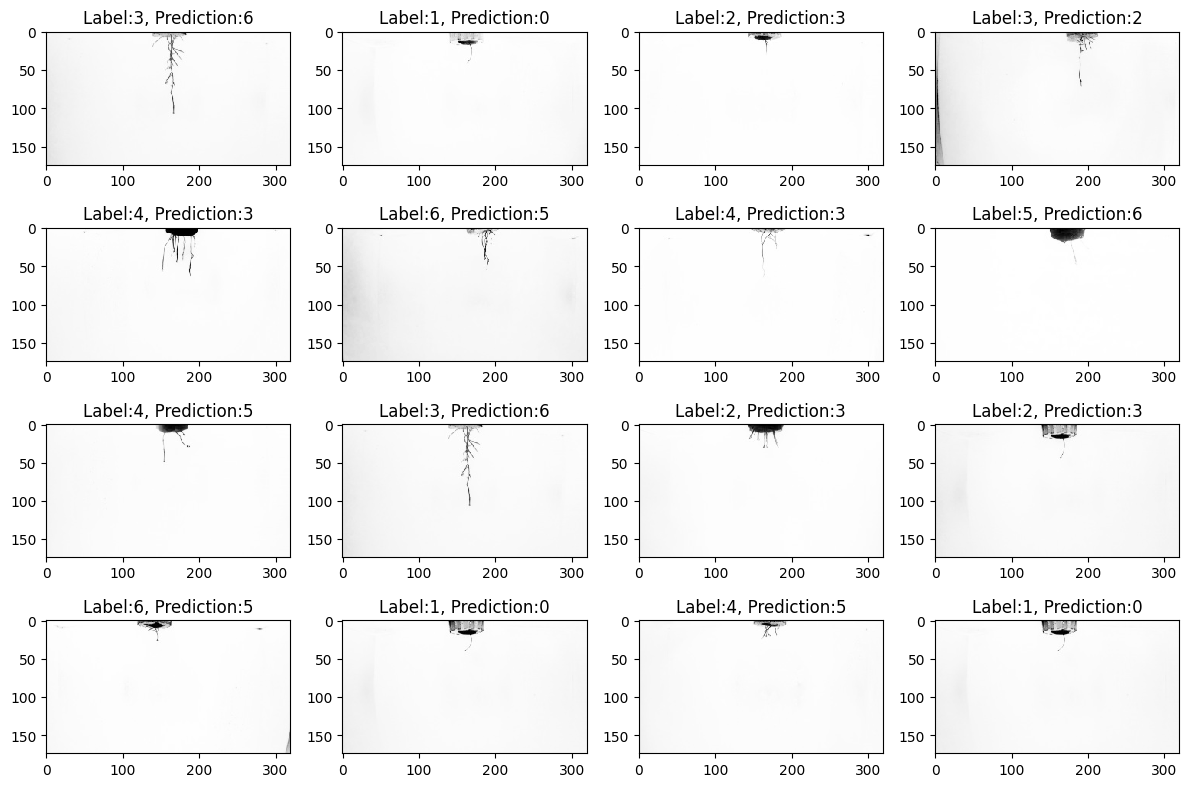

In [15]:

Y_test = np.concatenate(Y_test)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(174, 320), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)
plt.tight_layout()
plt.show()

In [14]:
print(len(wrong_result))

972


In [16]:
print(len(wrong_result))

188
